# INTRODUCTION

With this numerical dataset without specific variables I will try to find out if we can predict if a new value, depending on its value, can be part of a certain group of another values.

# IMPORTING LIBRARIES AND DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Classified Data", index_col = 0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# STANDARDIZATION OF NUMBERS

Standardization is a common preprocessing step in machine learning that helps to scale numerical features so that they have a mean of 0 and a standard deviation of 1.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [8]:
data_without_target_class = data.drop("TARGET CLASS", axis = 1)

In [9]:
scaler.fit(data_without_target_class)

StandardScaler()

In [11]:
scaled_features = scaler.transform(data_without_target_class)
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [14]:
data_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# CREATING THE MODEL

First we start with the split of the dataset to have four new datasets that will help us to create the fuction of the ML model

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = scaled_features
y = data["TARGET CLASS"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.3, random_state=101)

Second, we import the fuction model and put the first K value of 1.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pre = knn.predict(X_test)

Then, we are going to check if the ML fuction is working accurate

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test, pre))

[[151   8]
 [ 15 126]]


In [24]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# SUB-CONCLUSION

Our model fuction has a high accuracy with a K value of 1, but let check if by adding another number, we can increase that accuracy.

In [25]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pre_i = knn.predict(X_test)
    error_rate.append(np.mean(pre_i != y_test))

Text(0, 0.5, 'Error Rate')

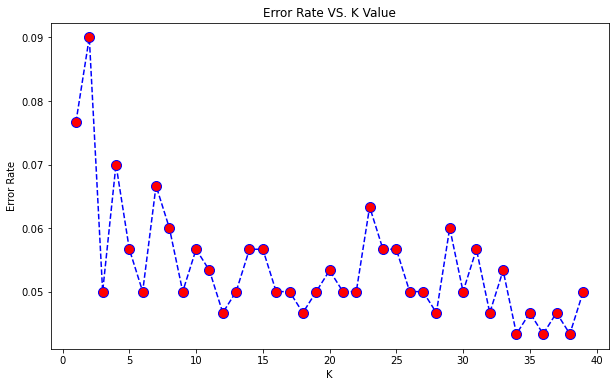

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize = 10)
plt.title("Error Rate VS. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

With the plot mentioned above, we can see that there is a better options because they have a lower error rate.Those values are 34,36,38.

In [29]:
knn = KNeighborsClassifier(n_neighbors = 34)
knn.fit(X_train, y_train)
pre = knn.predict(X_test)

In [30]:
print(confusion_matrix(y_test, pre))
print("******************")
print(classification_report(y_test, pre))

[[153   6]
 [  7 134]]
******************
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# CONCLUSION

We had a better result by changing the K value from 1 to 34. We could improve the accuracy in a 4%